<a href="https://colab.research.google.com/github/cycywanyeki20/Movies-Phase1-Project/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUSINESS UNDERSTANDING


**1.1 INTRODUCTION**

Microsoft Corporation is one of the world's leading technology companies. The company was founded in 1975 by Bill Gates and Paul Allen. The multinational technology company is known for its numerous software products, hardware and cloud computing services (Microsoft Azure). Microsoft is popularly known for its windows operating system that is found in a vast majority of PCs worldwide.



**1.2 PROJECT OVERVIEW**

This project is a response to the growing demand for Microsoft to venture into the movie making business. This move will enable Microsoft to tap into a new market while relaying a new service to their consumers. The success of Microsoft's new movie studio is dependent on making well-informed decisions that are data driven. The data driven decisions should propel the company forward with more sales and better customer engagement.


**1.3 BUSINESS PROBLEM**

Microsoft's key problem is lack of insights and knowledge in understanding the movie industry. This also includes understanding the types of movies that perform well at a box office level.
To address this challenge, the goal is to leverage exploratory data analysis (EDA) to gain insights into the characteristics and factors that contribute to the success of movies in the industry in order to translate into actionable recommendations that will guide Microsoft's new movie studio in making informed decisions about the types of films to produce.

**1.4 OBJECTIVES**



a) Explore trends in the budgets, movie genres and revenue overtime

b) Determine which genres have continually performed well in terms of box office revenue overtime

c) Provide data-driven insights and recommendations to assist Microsoft's new movie studio in propagating its film production strategy

d) Identify the key factors influencing the success of movies at the box office


**1.5 STAKEHOLDERS**

a) Executives from the movie industry

b) Head of Microsoft's movie studio.

c) Data Scientists and analysts involved in the project

d) Microsoft's marketing and sales team.



# **2. DATA PREPARATION**


**2.1 IMPORTING LIBRARIES**

In [ ]:
#Import all libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



**2.2 LOADING DATASETS**

First DataFrame (Bom Movie)

In [ ]:
#loading bom movie data set
bom_movie = pd.read_csv('/content/drive/MyDrive/bom.movie_gross.csv')
#The drive link appears because I am using the google collab notebook
bom_movie.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Second DataFrame (tmdb Movie)

In [ ]:
# loading tmdb movie data set
tmdb_movie = pd.read_csv('/content/drive/MyDrive/tmdb.movies.csv')
#The drive link appears because I am using the google collab notebook
tmdb_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Third DataFrame (tn Movie)

In [ ]:
# Loading tn movie data set
tn_movie = pd.read_csv('/content/drive/MyDrive/tn.movie_budgets.csv')
#The drive link appears because I am using the google collab notebook
tn_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Fourth DataFrame (imdb)

In [ ]:
#Establishing connection to the sql database
conn = sqlite3.connect('/content/drive/MyDrive/im.db')
#The drive link appears because I am using the google collab notebook
pd.read_sql

<function pandas.io.sql.read_sql(sql, con, index_col: 'str | list[str] | None' = None, coerce_float: 'bool' = True, params=None, parse_dates=None, columns: 'list[str] | None' = None, chunksize: 'int | None' = None) -> 'DataFrame | Iterator[DataFrame]'>

**2.3 QUERYING TABLES OF DATABASE IMDB FROM SQLITE3**

QERYING TABLES OF DATABASE (IMDB)

In [ ]:
#Establishing connection to the sql database and checking the available tables
conn = sqlite3.connect('/content/drive/MyDrive/im.db')
pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = 'table';
""",conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


QUERYING TABLES MOVIE_BASICS AND MOVIE_RATINGS FROM ("IM.DB")

In [ ]:
#connecting to the sql database with imdbbasics and reading the first 5 rows
im_movie_basics = pd.read_sql("""
                  SELECT*
                  FROM movie_basics;
                  """,conn)
im_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [ ]:
#connecting to the sql database with imdb ratings and reading the first 5 rows
im_movie_ratings = pd.read_sql("""
                  SELECT*
                  FROM movie_ratings;
                  """,conn)
im_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


**2.4 COMBINE MOVIE_RATINGS AND MOVIE_BASICS TABLES**

In [ ]:
#merge the two datasets (movie_ratings and movie_basics)
merged_dataset =pd.merge(im_movie_basics, im_movie_ratings, on='movie_id')
#The two datasets have been merged on a common column movie_id.



In [ ]:
#check the first 10 rows of the merged dataset
merged_dataset.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


**2.5 MERGING THE ABOVE COMBINED DATAFRAME TO THE "bom.movie_gross.csv" DATAFRAME**

In [ ]:
# Merge bom_movie with the existing merged dataset
#concatenate vertically with axis=o because there are no common columns in both datasets
combined_df = pd.concat([merged_dataset, bom_movie], axis=0, ignore_index=True)



In [ ]:
#summary info of the combined df dataframe
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77243 entries, 0 to 77242
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  float64
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  float64
 8   title            3387 non-null   object 
 9   studio           3382 non-null   object 
 10  domestic_gross   3359 non-null   float64
 11  foreign_gross    2037 non-null   object 
 12  year             3387 non-null   float64
dtypes: float64(6), object(7)
memory usage: 7.7+ MB


**2.6 2.5 MERGING THE ABOVE COMBINED DATAFRAME TO THE "tn.movie_budgets.csv" DATAFRAME**

In [ ]:
#merge the combined_df dataframe with tn_movie dataframe based on movie_title
tn_movie= pd.read_csv("/content/drive/MyDrive/tn.movie_budgets.csv")
#The drive link appears because I am using the google collab notebook
final_merged_df = pd.merge(combined_df, tn_movie, left_on='primary_title', right_on='movie', how='inner')

# Drop the duplicate 'movie' column from the merged DataFrame
final_merged_df.drop(columns=['movie'], inplace=True)

# Display the final merged DataFrame
print(final_merged_df)

       movie_id  primary_title original_title  start_year  runtime_minutes  \
0     tt0249516     Foodfight!     Foodfight!      2012.0             91.0   
1     tt0326592  The Overnight  The Overnight      2010.0             88.0   
2     tt3844362  The Overnight  The Overnight      2015.0             79.0   
3     tt0337692    On the Road    On the Road      2012.0            124.0   
4     tt4339118    On the Road    On the Road      2014.0             89.0   
...         ...            ...            ...         ...              ...   
2870  tt8680254    Richard III    Richard III      2016.0              NaN   
2871  tt8824064         Heroes         Heroes      2019.0             88.0   
2872  tt8976772           Push           Push      2019.0             92.0   
2873  tt9024106      Unplanned      Unplanned      2019.0            106.0   
2874  tt9248762  The Terrorist  The Terrorist      2018.0              NaN   

                       genres  averagerating  numvotes title st

In [ ]:
#Display the final_merged_df
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",1.9,8248.0,NaN,NaN,NaN,NaN,NaN,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,7.5,24.0,NaN,NaN,NaN,NaN,NaN,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",6.1,14828.0,NaN,NaN,NaN,NaN,NaN,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,NaN,NaN,NaN,NaN,NaN,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,NaN,NaN,NaN,NaN,NaN,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,NaN,Drama,9.1,28.0,NaN,NaN,NaN,NaN,NaN,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.0,Documentary,7.3,7.0,NaN,NaN,NaN,NaN,NaN,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.0,Documentary,7.3,33.0,NaN,NaN,NaN,NaN,NaN,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",6.3,5945.0,NaN,NaN,NaN,NaN,NaN,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


# **3. DATA UNDERSTANDING**


3.1 ANALYZING THE DATASET

In [ ]:
#Check the rows at the top of the data set
final_merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",1.9,8248.0,NaN,NaN,NaN,NaN,NaN,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,7.5,24.0,NaN,NaN,NaN,NaN,NaN,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",6.1,14828.0,NaN,NaN,NaN,NaN,NaN,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,NaN,NaN,NaN,NaN,NaN,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,NaN,NaN,NaN,NaN,NaN,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"


In [ ]:
#check the rows at the bottom of the dataset
final_merged_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,production_budget,domestic_gross_y,worldwide_gross
2870,tt8680254,Richard III,Richard III,2016.0,NaN,Drama,9.1,28.0,NaN,NaN,NaN,NaN,NaN,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.0,Documentary,7.3,7.0,NaN,NaN,NaN,NaN,NaN,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.0,Documentary,7.3,33.0,NaN,NaN,NaN,NaN,NaN,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",6.3,5945.0,NaN,NaN,NaN,NaN,NaN,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"
2874,tt9248762,The Terrorist,The Terrorist,2018.0,NaN,Thriller,6.0,6.0,NaN,NaN,NaN,NaN,NaN,48,"Jan 14, 2000","$25,000","$195,043","$195,043"


In [ ]:
#check info of the dataset
final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2875 non-null   object 
 1   primary_title      2875 non-null   object 
 2   original_title     2875 non-null   object 
 3   start_year         2875 non-null   float64
 4   runtime_minutes    2757 non-null   float64
 5   genres             2867 non-null   object 
 6   averagerating      2875 non-null   float64
 7   numvotes           2875 non-null   float64
 8   title              0 non-null      object 
 9   studio             0 non-null      object 
 10  domestic_gross_x   0 non-null      float64
 11  foreign_gross      0 non-null      object 
 12  year               0 non-null      float64
 13  id                 2875 non-null   int64  
 14  release_date       2875 non-null   object 
 15  production_budget  2875 non-null   object 
 16  domestic_gross_y   2875 

The results tell us that there are 384 floats, 64 integerd and 11 objects.
The info also shows the total number of non-null values

In [ ]:
#check the total entries in each column
final_merged_df.count()

movie_id             2875
primary_title        2875
original_title       2875
start_year           2875
runtime_minutes      2757
genres               2867
averagerating        2875
numvotes             2875
title                   0
studio                  0
domestic_gross_x        0
foreign_gross           0
year                    0
id                   2875
release_date         2875
production_budget    2875
domestic_gross_y     2875
worldwide_gross      2875
dtype: int64

The results tell us that the entries in each column range between 0-2875

In [ ]:
#Describing the dataset
final_merged_df.describe

<bound method NDFrame.describe of        movie_id  primary_title original_title  start_year  runtime_minutes  \
0     tt0249516     Foodfight!     Foodfight!      2012.0             91.0   
1     tt0326592  The Overnight  The Overnight      2010.0             88.0   
2     tt3844362  The Overnight  The Overnight      2015.0             79.0   
3     tt0337692    On the Road    On the Road      2012.0            124.0   
4     tt4339118    On the Road    On the Road      2014.0             89.0   
...         ...            ...            ...         ...              ...   
2870  tt8680254    Richard III    Richard III      2016.0              NaN   
2871  tt8824064         Heroes         Heroes      2019.0             88.0   
2872  tt8976772           Push           Push      2019.0             92.0   
2873  tt9024106      Unplanned      Unplanned      2019.0            106.0   
2874  tt9248762  The Terrorist  The Terrorist      2018.0              NaN   

                       genres

The results tell us that there are 18 columns and 2875 rows in the dataset

In [ ]:
#Check the columns of the dataset
final_merged_df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title',
       'studio', 'domestic_gross_x', 'foreign_gross', 'year', 'id',
       'release_date', 'production_budget', 'domestic_gross_y',
       'worldwide_gross'],
      dtype='object')

The results show all the columns present after merging the datasets

#**4. DATA CLEANING**


4.1 CHECKING NULLS

In [ ]:
# Check for null values using 'isnull()'
null_values = final_merged_df.isnull()

The results show that null values are present in the dataset

In [ ]:
# Display the count of null values in each column
print(null_values.sum())

movie_id                0
primary_title           0
original_title          0
start_year              0
runtime_minutes       118
genres                  8
averagerating           0
numvotes                0
title                2875
studio               2875
domestic_gross_x     2875
foreign_gross        2875
year                 2875
id                      0
release_date            0
production_budget       0
domestic_gross_y        0
worldwide_gross         0
dtype: int64


In [ ]:
#calculate the total number of non_null values
non_null_count = final_merged_df.shape[0]
non_null_count

2875

In [ ]:
# Calculate the percentage of null values in each column
null_percentage = (final_merged_df.isnull().sum() / len(final_merged_df)) * 100

# Display the result
print(null_percentage)

movie_id               0.000000
primary_title          0.000000
original_title         0.000000
start_year             0.000000
runtime_minutes        4.104348
genres                 0.278261
averagerating          0.000000
numvotes               0.000000
title                100.000000
studio               100.000000
domestic_gross_x     100.000000
foreign_gross        100.000000
year                 100.000000
id                     0.000000
release_date           0.000000
production_budget      0.000000
domestic_gross_y       0.000000
worldwide_gross        0.000000
dtype: float64


In [ ]:
# Drop columns with 100% missing values
final_merged_df = final_merged_df.dropna(axis=1, how='all')
#axis=1 means we want to drop columns not rows

In [ ]:
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.0,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.0,None,7.5,24.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.0,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.0,"Adventure,Drama,Romance",6.1,37886.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.0,Drama,6.0,6.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,NaN,Drama,9.1,28.0,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.0,Documentary,7.3,7.0,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.0,Documentary,7.3,33.0,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.0,"Biography,Drama",6.3,5945.0,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [ ]:
# Calculate the mean value of the 'Runtime' column
final_merged_df['runtime_minutes'].fillna(final_merged_df['runtime_minutes'].mean(), inplace=True)
 #ignore the error below
final_merged_df


<ipython-input-29-83df31e92909>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df['runtime_minutes'].fillna(final_merged_df['runtime_minutes'].mean(), inplace=True)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.000000,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.000000,None,7.5,24.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.000000,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.000000,"Adventure,Drama,Romance",6.1,37886.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.000000,Drama,6.0,6.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,102.945956,Drama,9.1,28.0,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.000000,Documentary,7.3,7.0,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.000000,Documentary,7.3,33.0,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.000000,"Biography,Drama",6.3,5945.0,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [ ]:
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.000000,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.000000,None,7.5,24.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.000000,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.000000,"Adventure,Drama,Romance",6.1,37886.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.000000,Drama,6.0,6.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,102.945956,Drama,9.1,28.0,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.000000,Documentary,7.3,7.0,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.000000,Documentary,7.3,33.0,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.000000,"Biography,Drama",6.3,5945.0,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [ ]:
#Calculate the mode in the genre column
final_merged_df['genres'].fillna(final_merged_df['genres'].mode()[0], inplace=True)
final_merged_df

<ipython-input-31-67b7c3f6f339>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df['genres'].fillna(final_merged_df['genres'].mode()[0], inplace=True)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2012.0,91.000000,"Action,Animation,Comedy",1.9,8248.0,26,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,88.000000,Drama,7.5,24.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2015.0,79.000000,"Comedy,Mystery",6.1,14828.0,21,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2012.0,124.000000,"Adventure,Drama,Romance",6.1,37886.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2014.0,89.000000,Drama,6.0,6.0,17,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2016.0,102.945956,Drama,9.1,28.0,65,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2019.0,88.000000,Documentary,7.3,7.0,12,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2019.0,92.000000,Documentary,7.3,33.0,70,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2019.0,106.000000,"Biography,Drama",6.3,5945.0,33,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


In [ ]:
#Check if there are any more null values in the dataset
final_merged_df.isnull().values.any()

False

The results show that there are no more null values in the dataset.

4.2 CHECKING DUPLICATES

In [ ]:
#Check for duplicate values in the dataset
final_merged_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2870    False
2871    False
2872    False
2873    False
2874    False
Length: 2875, dtype: bool

The results show that there are no duplicate values in the dataset.

4.3 CHECKING OUTLIERS

In [ ]:
import pandas as pd
from scipy import stats

#final_merged_df is the DataFrame

# Define a function to detect outliers using the Z-score
def detect_outliers_zscore(df, threshold=3):
    # Create a copy of the DataFrame with only numeric columns
    numeric_df = df.select_dtypes(include=[np.number])
    #This eliminates strings from the dataframe in order to focus on the numeric values only

    # Calculate Z-scores for numeric columns
    z_scores = np.abs(stats.zscore(numeric_df))

    # Find outliers based on the Z-score
    outlier_rows, outlier_columns = np.where(z_scores > threshold)

    return list(zip(outlier_rows, outlier_columns))

# Set a threshold for the Z-score (e.g., 3 is a common threshold)
z_score_threshold = 3

# Detect outliers in 'final_merged_df' based on the Z-score
outliers = detect_outliers_zscore(final_merged_df, z_score_threshold)

# Print the row and column indices of the detected outliers
print("Detected outliers (row, column):", outliers)















Detected outliers (row, column): [(0, 2), (8, 3), (20, 3), (28, 3), (32, 3), (35, 3), (50, 3), (53, 2), (70, 3), (72, 3), (84, 3), (93, 2), (101, 1), (101, 3), (102, 3), (115, 3), (116, 3), (132, 3), (134, 1), (134, 3), (143, 3), (145, 3), (176, 1), (176, 3), (200, 3), (218, 3), (224, 1), (232, 3), (277, 3), (298, 3), (330, 3), (347, 3), (348, 1), (362, 3), (374, 3), (404, 3), (430, 3), (437, 1), (439, 3), (446, 3), (464, 3), (478, 3), (496, 3), (524, 3), (545, 1), (551, 1), (555, 2), (561, 3), (568, 3), (578, 3), (579, 3), (581, 3), (643, 3), (652, 1), (661, 2), (676, 3), (683, 3), (718, 3), (754, 2), (800, 1), (858, 1), (984, 3), (1000, 3), (1006, 3), (1031, 2), (1051, 3), (1071, 3), (1100, 2), (1129, 2), (1134, 1), (1155, 2), (1183, 1), (1222, 1), (1261, 2), (1307, 2), (1328, 2), (1349, 3), (1367, 1), (1382, 1), (1395, 3), (1421, 1), (1421, 3), (1457, 3), (1484, 1), (1523, 3), (1539, 1), (1540, 1), (1543, 1), (1544, 1), (1545, 1), (1546, 1), (1570, 3), (1601, 3), (1611, 3), (1698, 3

The above results show the outliers in each row and column

Handle Outliers

In [ ]:
#Handle outliers in final_merged_df
#import libraries
from scipy.stats.mstats import winsorize

# Define the lower and upper quantile thresholds
lower_threshold = 0.01  # You can adjust this threshold
upper_threshold = 0.99  # You can adjust this threshold

# Loop through the columns and winsorize the data
for column in final_merged_df.columns:
    if final_merged_df[column].dtype in ['int64', 'float64']:
        # Check if the column contains numerical data (you can customize this condition)
        winsorized_data = winsorize(final_merged_df[column], limits=(lower_threshold, upper_threshold))
        final_merged_df.loc[:, column] = winsorized_data

<ipython-input-44-609cc3e4b9d0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df.loc[:, column] = winsorized_data


Avoid the error above as the values have been assigned the winsorized values to the specific column in the original DataFrame final_merged_df

In [ ]:
final_merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2010.0,52.0,"Action,Animation,Comedy",2.9,5.0,2,"Dec 31, 2012","$45,000,000",$0,"$73,706"
1,tt0326592,The Overnight,The Overnight,2010.0,52.0,Drama,2.9,5.0,2,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
2,tt3844362,The Overnight,The Overnight,2010.0,52.0,"Comedy,Mystery",2.9,5.0,2,"Jun 19, 2015","$200,000","$1,109,808","$1,165,996"
3,tt0337692,On the Road,On the Road,2010.0,52.0,"Adventure,Drama,Romance",2.9,5.0,2,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
4,tt4339118,On the Road,On the Road,2010.0,52.0,Drama,2.9,5.0,2,"Mar 22, 2013","$25,000,000","$720,828","$9,313,302"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2870,tt8680254,Richard III,Richard III,2010.0,52.0,Drama,2.9,5.0,2,"Dec 29, 1995","$9,200,000","$2,684,904","$4,199,334"
2871,tt8824064,Heroes,Heroes,2010.0,52.0,Documentary,2.9,5.0,2,"Oct 24, 2008","$400,000","$655,538","$655,538"
2872,tt8976772,Push,Push,2010.0,52.0,Documentary,2.9,5.0,2,"Feb 6, 2009","$38,000,000","$31,811,527","$49,678,401"
2873,tt9024106,Unplanned,Unplanned,2010.0,52.0,"Biography,Drama",2.9,5.0,2,"Mar 29, 2019","$6,000,000","$18,107,621","$18,107,621"


4.4 DATA DECISIONS


To arrive at the final decision, the focus will be on the production_budget and worldwide gross revenue of less than $10 Million.

In [ ]:
# Convert 'production_budget' and 'worldwide_gross' to numeric (if not already)
final_merged_df['production_budget'] = pd.to_numeric(final_merged_df['production_budget'], errors='coerce')
final_merged_df['worldwide_gross'] = pd.to_numeric(final_merged_df['worldwide_gross'], errors='coerce')


# Remove rows with missing values in 'production_budget' or 'worldwide_gross'
final_merged_df = final_merged_df.dropna(subset=['production_budget', 'worldwide_gross'])

# Filter the DataFrame for movies with production budget and worldwide gross >= $10 million
filtered_df = final_merged_df[(final_merged_df['production_budget'] >= 10_000_000) & (final_merged_df['worldwide_gross'] >= 10_000_000)]

<ipython-input-49-fba4a71b6af5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df['production_budget'] = pd.to_numeric(final_merged_df['production_budget'], errors='coerce')
<ipython-input-49-fba4a71b6af5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df['worldwide_gross'] = pd.to_numeric(final_merged_df['worldwide_gross'], errors='coerce')


In [ ]:
#check the rows of the new dataframe formed above 'final_merged_df'
final_merged_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,tt0249516,Foodfight!,Foodfight!,2010.0,52.0,"Action,Animation,Comedy",2.9,5.0,2,"Dec 31, 2012",45000000.0,$0,7.370600e+04
1,tt0326592,The Overnight,The Overnight,2010.0,52.0,Drama,2.9,5.0,2,"Jun 19, 2015",200000.0,"$1,109,808",1.165996e+06
2,tt3844362,The Overnight,The Overnight,2010.0,52.0,"Comedy,Mystery",2.9,5.0,2,"Jun 19, 2015",200000.0,"$1,109,808",1.165996e+06
3,tt0337692,On the Road,On the Road,2010.0,52.0,"Adventure,Drama,Romance",2.9,5.0,2,"Mar 22, 2013",25000000.0,"$720,828",9.313302e+06
4,tt4339118,On the Road,On the Road,2010.0,52.0,Drama,2.9,5.0,2,"Mar 22, 2013",25000000.0,"$720,828",9.313302e+06
5,tt5647250,On the Road,On the Road,2010.0,52.0,Drama,2.9,5.0,2,"Mar 22, 2013",25000000.0,"$720,828",9.313302e+06
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2010.0,52.0,"Adventure,Comedy,Drama",2.9,5.0,2,"Dec 25, 2013",91000000.0,"$58,236,838",1.878612e+08
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2010.0,52.0,"Action,Crime,Drama",2.9,5.0,2,"Sep 19, 2014",28000000.0,"$26,017,685",6.210859e+07
8,tt0369610,Jurassic World,Jurassic World,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5.0,2,"Jun 12, 2015",215000000.0,"$652,270,625",1.648855e+09
9,tt0376136,The Rum Diary,The Rum Diary,2010.0,52.0,"Comedy,Drama",2.9,5.0,2,"Oct 28, 2011",45000000.0,"$13,109,815",2.154473e+07


In [ ]:
# Create a copy of the filtered DataFrame
filtered_df_copy = filtered_df.copy()


In [ ]:
# Calculate the profit and assign it to the copy
filtered_df_copy['profit'] = filtered_df_copy['worldwide_gross'] - filtered_df_copy['production_budget']

In [ ]:
#Display the column names and rows in filtered_df_copy.
filtered_df_copy.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross,profit
6,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2010.0,52.0,"Adventure,Comedy,Drama",2.9,5.0,2,"Dec 25, 2013",91000000.0,"$58,236,838",1.878612e+08,9.686118e+07
7,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2010.0,52.0,"Action,Crime,Drama",2.9,5.0,2,"Sep 19, 2014",28000000.0,"$26,017,685",6.210859e+07,3.410859e+07
8,tt0369610,Jurassic World,Jurassic World,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5.0,2,"Jun 12, 2015",215000000.0,"$652,270,625",1.648855e+09,1.433855e+09
9,tt0376136,The Rum Diary,The Rum Diary,2010.0,52.0,"Comedy,Drama",2.9,5.0,2,"Oct 28, 2011",45000000.0,"$13,109,815",2.154473e+07,-2.345527e+07
10,tt0383010,The Three Stooges,The Three Stooges,2010.0,52.0,"Comedy,Family",2.9,5.0,2,"Apr 13, 2012",30000000.0,"$44,338,224",5.405225e+07,2.405225e+07


In [ ]:
# Calculate profit and add it as a new column
filtered_df_copy['profit'] = filtered_df_copy['worldwide_gross'] - filtered_df_copy['production_budget']

In [ ]:
# Filter movies with profit greater than zero
profit_movies = filtered_df_copy[filtered_df_copy['profit'] > 0]

# Sort profitable movies by profit in descending order
sorted_profitable_movies = profit_movies.sort_values(by='profit', ascending=False)

# Display the sorted profitable movies
print(sorted_profitable_movies)

       movie_id           primary_title            original_title  start_year  \
1279  tt1775309                  Avatar                     Abatâ      2010.0   
2057  tt2495766                 Titanic                   Titanic      2010.0   
2538  tt4154756  Avengers: Infinity War    Avengers: Infinity War      2010.0   
8     tt0369610          Jurassic World            Jurassic World      2010.0   
2190  tt2820852               Furious 7             Furious Seven      2010.0   
...         ...                     ...                       ...         ...   
160   tt0970179                    Hugo                      Hugo      2010.0   
1661  tt4996022                Lovesick                  Lovesick      2010.0   
1660  tt2404299                Lovesick                  Lovesick      2010.0   
1659  tt2075241                Lovesick  Lian ai kong huang zheng      2010.0   
1085  tt1682180                  Stoker                    Stoker      2010.0   

      runtime_minutes      

In [ ]:
#Display column names and rows in sorted_profitable_movies dataframe.
sorted_profitable_movies.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,id,release_date,production_budget,domestic_gross_y,worldwide_gross,profit
1279,tt1775309,Avatar,Abatâ,2010.0,52.0,Horror,2.9,5.0,2,"Dec 18, 2009",425000000.0,"$760,507,625",2.776345e+09,2.351345e+09
2057,tt2495766,Titanic,Titanic,2010.0,52.0,Adventure,2.9,5.0,2,"Dec 19, 1997",200000000.0,"$659,363,944",2.208208e+09,2.008208e+09
2538,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5.0,2,"Apr 27, 2018",300000000.0,"$678,815,482",2.048134e+09,1.748134e+09
8,tt0369610,Jurassic World,Jurassic World,2010.0,52.0,"Action,Adventure,Sci-Fi",2.9,5.0,2,"Jun 12, 2015",215000000.0,"$652,270,625",1.648855e+09,1.433855e+09
2190,tt2820852,Furious 7,Furious Seven,2010.0,52.0,"Action,Crime,Thriller",2.9,5.0,2,"Apr 3, 2015",190000000.0,"$353,007,020",1.518723e+09,1.328723e+09


# **5. EXPLORATORY DATA ANALYSIS**

UNIVARIATE ANALYSIS

In [ ]:
# Group movies by genre and count them
movie_genre_counts = filtered_df_copy['genres'].str.split(',').explode().str.strip().value_counts()

# Display the counts of movies by genre
print(movie_genre_counts)

Drama          735
Action         456
Comedy         450
Adventure      369
Thriller       260
Crime          210
Romance        162
Horror         137
Sci-Fi         136
Fantasy        126
Biography      116
Animation      111
Mystery        107
Family          91
Documentary     85
History         43
Music           34
Sport           30
War             19
Musical         11
Western          5
News             2
Name: genres, dtype: int64


From the above results we can see that the most frequent genres are;
drama(735 counts)
Action (456 Counts)
Comedy (450 counts).
Adventure, thriller and crime follow closely with frequent counts.

Group movies by genre and calculate the total production budget for the top 10 genres.

In [ ]:
#To group movies by genre and calculate the total production budget for the top 10 genres.


# Split the genres then explode to create one row per genre
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')

# Group by each genre and calculate the total production budget for each genre
genre_budget_total = filtered_df_copy.groupby('genres')['production_budget'].sum()

# Sort the genres by total production budget in descending order
genre_budget_total = genre_budget_total.sort_values(ascending=False)

# Select the top 10 genres
top_10_genres = genre_budget_total.head(10)

# Display the top 10 genres and their total production budget
print(top_10_genres)

genres
Adventure    4.020284e+10
Action       3.898310e+10
Drama        3.027610e+10
Comedy       2.343720e+10
Sci-Fi       1.391430e+10
Thriller     1.240410e+10
Fantasy      1.169480e+10
Animation    1.093300e+10
Crime        8.696700e+09
Family       7.210000e+09
Name: production_budget, dtype: float64


From the above results, it is evident that production_budget differs with each type of movie genre.  The genres with the high production_budget are Adventure, Action and drama followed closely by comedy,sci-fi, thriller and fantasy.

Calculate the total worldwide gross for top 10 genres

In [ ]:
# calculate the total worldwide gross for top 10 genres by grouping movies by each genre

# Split the genres and explode to create one row per genre
filtered_df_copy['genres'] = filtered_df_copy['genres'].str.split(',')
filtered_df_copy = filtered_df_copy.explode('genres')

# Group by genre and calculate the total worldwide gross for each genre
genre_gross = filtered_df_copy.groupby('genres')['worldwide_gross'].sum()

# Sort the genres by total worldwide gross in descending order
genre_gross = genre_gross.sort_values(ascending=False)

# Select the top 10 genres
top_10_genres = genre_gross.head(10)

# Display the top 10 genres and their total worldwide gross
print(top_10_genres)


genres
Adventure    1.338000e+11
Action       1.173538e+11
Drama        8.285168e+10
Comedy       7.721282e+10
Sci-Fi       4.972462e+10
Animation    4.094188e+10
Thriller     3.713062e+10
Fantasy      3.663144e+10
Crime        2.311303e+10
Family       2.242730e+10
Name: worldwide_gross, dtype: float64


The genres with the highest worlwide gross revenue are action, drama and comedy followed closely by sci-fi, animation and thriller. fantasy, crime and family accrued a substantial amount of worlwide gross.

Calculate the total worldwide profit for top 10 genres

In [ ]:
# Group by genre and calculate the total worldwide profit for each genre
genre_profit_total = filtered_df_copy.groupby('genres')['profit'].sum()

# Sort the genres by total worldwide profit in descending order
genre_profit_total = genre_profit_total.sort_values(ascending=False)

# Select the top 10 genres
top_10_profit_genres = genre_profit_total.head(10)

# Display the top 10 genres and their total worldwide profit
print(top_10_profit_genres)

genres
Adventure    9.359715e+10
Action       7.837073e+10
Comedy       5.377562e+10
Drama        5.257558e+10
Sci-Fi       3.581032e+10
Animation    3.000888e+10
Fantasy      2.493664e+10
Thriller     2.472652e+10
Family       1.521730e+10
Crime        1.441633e+10
Name: profit, dtype: float64


The highest profit was from Adventure, Action and Comedy. Genres such as Drama, SCi-Fi and Animation also produced a substantially high profit as well.

# DATA VISUALIZATION


VISUALIZE TOP 10 GENRES BY PRODUCTION BUDGET

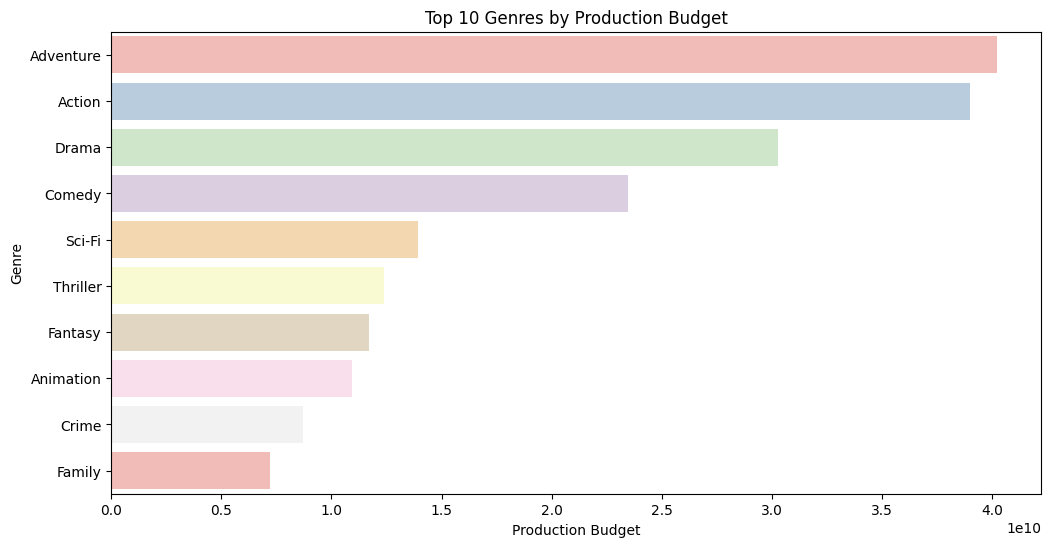

In [ ]:
# Group by genre and calculate the total production budget for each genre
genre_total_budget = filtered_df_copy.groupby('genres')['production_budget'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 genres by production budget
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_total_budget.values, y=genre_total_budget.index, palette='Pastel1')
plt.title('Top 10 Genres by Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Genre')
plt.show()

From our results, we can conclude that the genres with the highest production budget are Adventure, Action and Drama. Comedy and Sci-fi follow closely with a significantly high amount of production_budget as well.

VISUALIZE TOP 10 GENRES BY COUNT

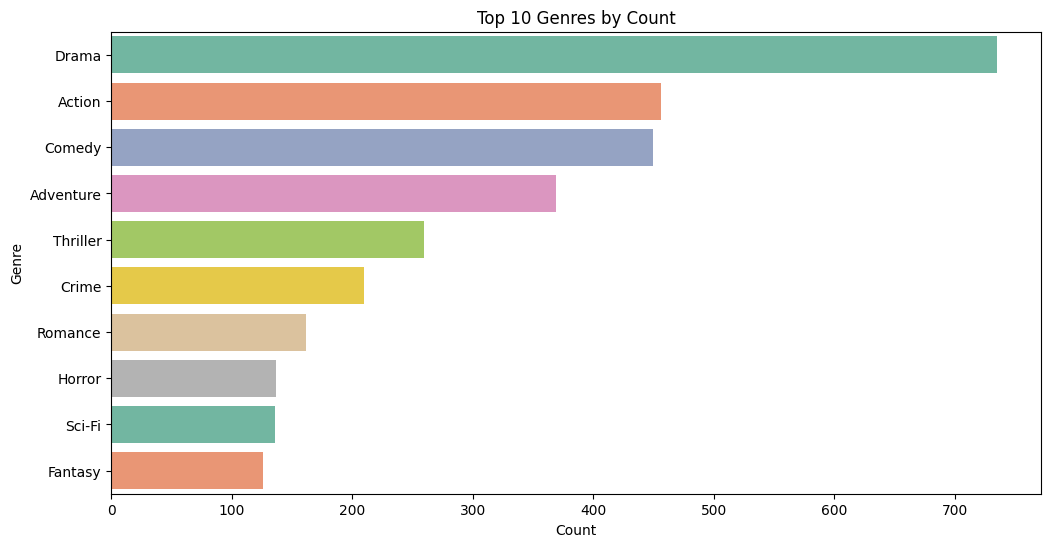

In [ ]:
# Count the occurrences of each genre
genre_count = filtered_df_copy['genres'].value_counts().head(10)

# Create a bar plot for the top 10 genres by count
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='Set2')
plt.title('Top 10 Genres by Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

The most produced genres from our results are drama, action and comedy. The genres that follow closely in the list are adventure, thriller and crime.

VISUALIZE TOP TEN GENRES BY WORLDWIDE GROSS

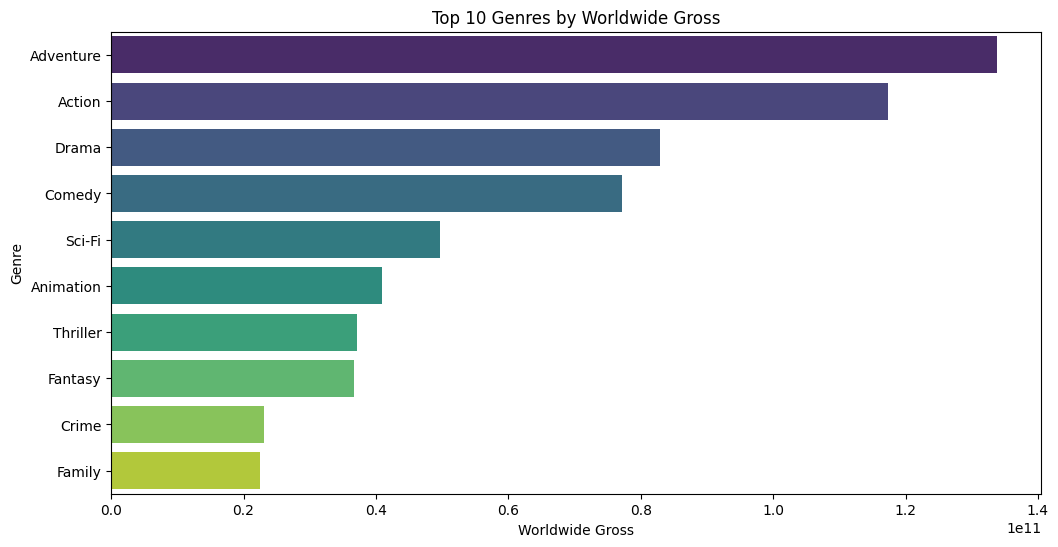

In [ ]:
# Group by genre and calculate the total worldwide gross for each genre
genre_total_gross = filtered_df_copy.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 genres by worldwide gross
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_total_gross.values, y=genre_total_gross.index, palette='viridis')
plt.title('Top 10 Genres by Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Genre')
plt.show()

According to the results, we can conclude that the genres with a high worlwide gross are Adventure,Action and Drama. Those with a low worlwide gross are crime and family.

VISUALIZE TOP 10 GENRES BY PROFIT

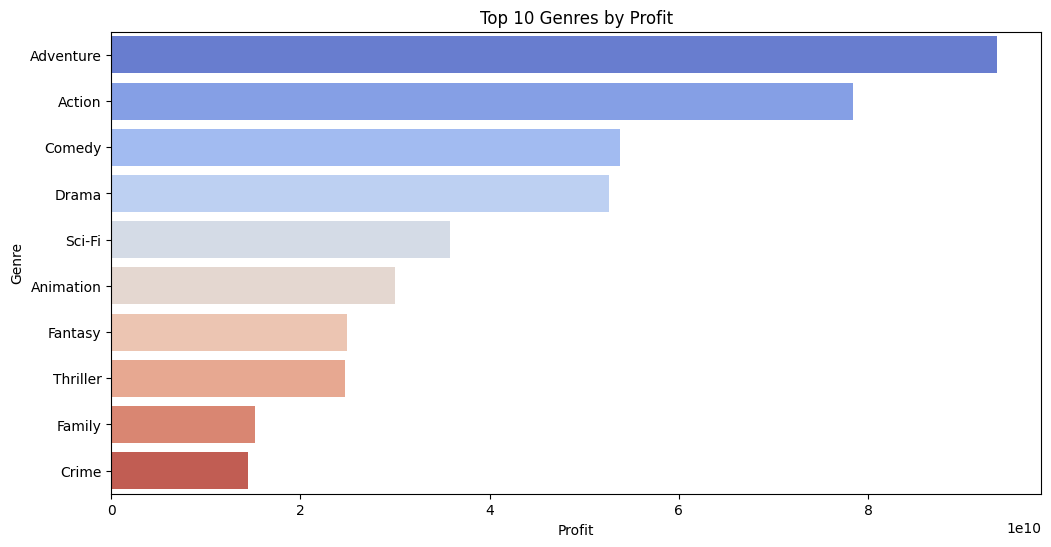

In [ ]:
# Group by genre and calculate the total profit for each genre
genre_total_profit = filtered_df_copy.groupby('genres')['profit'].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 genres by profit
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_total_profit.values, y=genre_total_profit.index, palette='coolwarm')
plt.title('Top 10 Genres by Profit')
plt.xlabel('Profit')
plt.ylabel('Genre')
plt.show()

The genres with the high profit are Adventure, Action and Comedy. Those that have yieled a low profit accordint to the results are family and crime.

**SCATTER PLOT**

SCATTER PLOT SHOWING THE RELATIONSHIP BETWEEN PRODUCTION BUDGET AND PROFIT

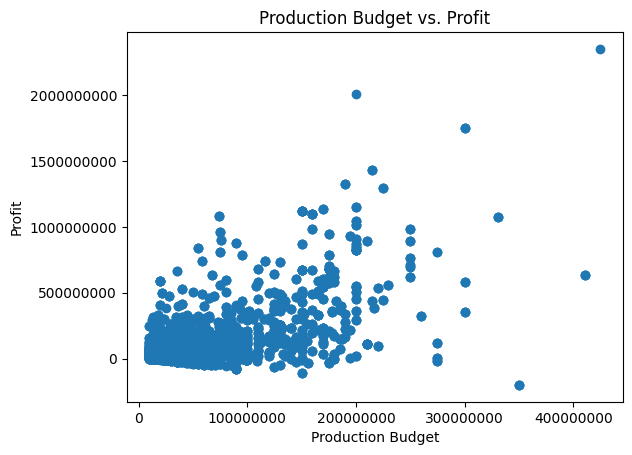

In [ ]:
#Create a scatter plot of the top 10 genres by budget and profit
plt.scatter(filtered_df_copy['production_budget'], filtered_df_copy['profit'])
plt.title("Production Budget vs. Profit")
plt.xlabel("Production Budget")
plt.ylabel("Profit")
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

From the above results, we can see that there is a positive correlation of approximately 0.57. This means that there is a positive correlation between average production budget and average profit.

In conclusion, the genres with a higher production budget produce high profits as well.

# **6. CONCLUSION**

GENRE

The genre 'Adventure' has the highest movie count meaning it is the most popular genre to consumers.

The Adventure and Action genre have the highest total production budget meaning that they require a good amount of investment to meet the costs.

Although the genres 'Adventure' and 'Action' have the highest total production budget, the two genres also top the list in terms of total worldwide gross revenue.

Comedy and drama have the lowest production budgets and despite this, they have topped among the list for genres with the highest total profit. These two genres can yield a substantially favourable return on investment due to low production costs.


PRODUCTION BUDGET AND PROFIT

The genres with the highest production budget have yielded the highest total profit reinforcing that indeed a good investment in production leads to good returns.

There is a very strong positive correlation between the average production budget and average total profit.

For genres with low production budget, careful budget management and genre_strateies can still propel towards making high profts.

# **7. RECOMMENDATIONS**

-Focus on investing in the adventure and action geres due to their popularity and high profit returns.

-Avoid overspending on low budget genres such as comedy to maximize on profits as the genre also yields high profits.

-Allocate higher budget on Adventure genre as there is a positive correlation between high production budget ad high profit returns.



# **ACTIONABLE STEP**

-During budget allocation, invest more in the Adventure and Action genres to maximize on high profits.
-Likewise, moderate the budget for the comedy and crime genres because the return on investment is also high with a low budget.